# *FINAL ASSIGNMENT: BATTLE OF NEIGHBORHOODS*

# GOAL: FIND BEST LOCATIONS FOR AN ITALIAN RESTAURANT IN LONDON

### I Introduction & Problem Statement

### **Problem Statement**:

The goal is to use Data Analysis from web sources in order to chose the best location in London to open or invest in an Italian restaurant. We will explore all the neighborhoods of the safest borough in London which is **Kingston upon Thames** in order to provide a list of best locations as a suggestion to the entrepreneur.

![Italian Restaurant](https://ta-images.condecdn.net/image/3wA8ZAg7NAN/crop/1020/f/il-pampero-4.jpg)

### **Introduction** 

London is the capital and largest city of England and the United Kingdom. It is considered to be one of the world's most important global cities and has been termed the world's most powerful, most desirable, most influential, most visited, most expensive, innovative, sustainable, most investment friendly and most popular for work city in the world. London exerts a considerable impact upon the arts, commerce, education, entertainment, fashion, finance, health care, media, professional services, research and development, tourism and transportation. London ranks 26 out of 300 major cities for economic performance and is one of the largest financial centers.

London has a diverse range of people and cultures, and more than 300 languages are spoken in the region. Its estimated mid-2018 municipal population (corresponding to Greater London) was 8,908,081, the most populous of any city in the European Union and accounting for 13.4% of the UK population.

### **Target audience**

Entrepreneur who wants to find the best location to invest or open an Italian restaurant in London's borough Kingston upon Thames. This location is supposed not to have many Italian restaurants around to avoid competition and must be a convenient neighborhood.  

### **Collecting Data**

For this project we need the following data:
1. London city data that contains different Boroughs:
* We will scrape information of different boroughs in London from a Wikipedia page: https://en.wikipedia.org/wiki/List_of_London_boroughs
* We will explore all neighborhoods in the safest borough Kingston upon Thames: https://en.wikipedia.org/wiki/List_of_districts_in_the_Royal_Borough_of_Kingston_upon_Thames.

2. Italian restaurants in each neighborhood of the borough Kingston upon Thames.

* Data Source: Foursquare API
* Description: By using this API we will get all the venues in different London neighborhoods. We can filter these venues to get only Italian restaurants. We can also find rating, tips and like count for each Italian restaurant using FourSquare API.

### **Data approach**

* We will collect the London city data by using the Beautifulsoup library
* Using Foursquare API we will get all venues for each neighborhood.
* Filter out all venues which are Italian Restaurants.
* Data Visualization and some analysis.
* Find rating, tips and like count for each Italian restaurants using FourSquare API.
* Using rating for each restaurant, we will sort that data.
* Visualize the Ranking of neighborhoods using folium library(python)
* Visualize the neighborhood Kingston upon Thames with all Italian Restaurants.
* Deductions from these results and conclusions.

### II Data Analysis

In [2]:
!pip install beautifulsoup4
!pip install lxml
import requests # library to handle requests
import pandas as pd # library for data analsysis
import numpy as np # library to handle data in a vectorized manner
import random # library for random number generation

!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim # module to convert an address into latitude and longitude values

# libraries for displaying images
from IPython.display import Image 
from IPython.core.display import HTML 


from IPython.display import display_html
import pandas as pd
import numpy as np
    
# tranforming json file into a pandas dataframe library
from pandas.io.json import json_normalize

!conda install -c conda-forge folium=0.5.0 --yes
import folium # plotting library
from bs4 import BeautifulSoup
from sklearn.cluster import KMeans
import matplotlib.cm as cm
import matplotlib.colors as colors

print('Folium installed')
print('Libraries imported.')

     |████████████████████████████████| 112kB 25.1MB/s eta 0:00:01
     |████████████████████████████████| 5.8MB 7.3MB/s eta 0:00:01
Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.5.11
  latest version: 4.8.0

Please update conda by running

    $ conda update -n base -c defaults conda



## Package Plan ##

  environment location: /home/jupyterlab/conda/envs/python

  added / updated specs: 
    - geopy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    certifi-2019.11.28         |           py36_0         149 KB  conda-forge
    scikit-learn-0.20.1        |   py36h22eb022_0         5.7 MB
    liblapack-3.8.0            |      11_openblas          10 KB  conda-forge
    liblapacke-3.8.0           |      11_openblas          10 KB  conda-forge
    geographiclib-1.50         |             py_0          34 KB  conda-forge
    libopenblas-0

**We use Beautiful soup to scrap the latitude and longitude of the boroughs in London.**

In [3]:
# getting data from internet
wikipedia_link='https://en.wikipedia.org/wiki/List_of_London_boroughs'
raw_wikipedia_page= requests.get(wikipedia_link).text

# using beautiful soup to parse the HTML/XML codes.
soup = BeautifulSoup(raw_wikipedia_page,'xml')
print(soup.prettify())

<?xml version="1.0" encoding="utf-8"?>
<!DOCTYPE html>
<html class="client-nojs" dir="ltr" lang="en">
 <head>
  <meta charset="UTF-8"/>
  <title>
   List of London boroughs - Wikipedia
  </title>
  <script>
   document.documentElement.className="client-js";RLCONF={"wgBreakFrames":!1,"wgSeparatorTransformTable":["",""],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"dmy","wgMonthNames":["","January","February","March","April","May","June","July","August","September","October","November","December"],"wgMonthNamesShort":["","Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec"],"wgRequestId":"XgSfzwpAAEMAAGtNfyIAAABU","wgCSPNonce":!1,"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":!1,"wgNamespaceNumber":0,"wgPageName":"List_of_London_boroughs","wgTitle":"List of London boroughs","wgCurRevisionId":931680068,"wgRevisionId":931680068,"wgArticleId":28092685,"wgIsArticle":!0,"wgIsRedirect":!1,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories

**We define a function in order to get the London data such as Boroughs, Neighborhoods together with their latitude and longitude.**

In [4]:
# extracting the raw table
table = soup.find_all('table', {'class':'wikitable sortable'})
print(table)

[<table class="wikitable sortable" style="font-size:100%" width="100%">
<tbody><tr>
<th>Borough
</th>
<th>Inner
</th>
<th>Status
</th>
<th>Local authority
</th>
<th>Political control
</th>
<th>Headquarters
</th>
<th>Area (sq mi)
</th>
<th>Population (2013 est)<sup class="reference" id="cite_ref-1"><a href="#cite_note-1">[1]</a></sup>
</th>
<th>Co-ordinates
</th>
<th><span style="background:#67BCD3"> Nr. in map </span>
</th></tr>
<tr>
<td><a href="/wiki/London_Borough_of_Barking_and_Dagenham" title="London Borough of Barking and Dagenham">Barking and Dagenham</a> <sup class="reference" id="cite_ref-2"><a href="#cite_note-2">[note 1]</a></sup>
</td>
<td>
</td>
<td>
</td>
<td><a href="/wiki/Barking_and_Dagenham_London_Borough_Council" title="Barking and Dagenham London Borough Council">Barking and Dagenham London Borough Council</a>
</td>
<td><a href="/wiki/Labour_Party_(UK)" title="Labour Party (UK)">Labour</a>
</td>
<td><a class="new" href="/w/index.php?title=Barking_Town_Hall&amp;actio

In [6]:
london_data = pd.read_html(str(table[0]), index_col=None, header=0)[0]
london_data.head()

,Borough,Inner,Status,Local authority,Political control,Headquarters,Area (sq mi),Population (2013 est)[1],Co-ordinates,Nr. in map
0,Barking and Dagenham [note 1],NaN,NaN,Barking and Dagenham London Borough Council,Labour,"Town Hall, 1 Town Square",13.93,194352,51°33′39″N 0°09′21″E﻿ / ﻿51.5607°N 0.1557°E,25
1,Barnet,NaN,NaN,Barnet London Borough Council,Conservative,"North London Business Park, Oakleigh Road South",33.49,369088,51°37′31″N 0°09′06″W﻿ / ﻿51.6252°N 0.1517°W,31
2,Bexley,NaN,NaN,Bexley London Borough Council,Conservative,"Civic Offices, 2 Watling Street",23.38,236687,51°27′18″N 0°09′02″E﻿ / ﻿51.4549°N 0.1505°E,23
3,Brent,NaN,NaN,Brent London Borough Council,Labour,"Brent Civic Centre, Engineers Way",16.70,317264,51°33′32″N 0°16′54″W﻿ / ﻿51.5588°N 0.2817°W,12
4,Bromley,NaN,NaN,Bromley London Borough Council,Conservative,"Civic Centre, Stockwell Close",57.97,317899,51°24′14″N 0°01′11″E﻿ / ﻿51.4039°N 0.0198°E,20


**We will focus on the particular borough: Kingston upon Thames, which is the safest borough in London (this research has been done previously).** 

In [7]:
london_data.Borough

0       Barking and Dagenham [note 1]
1                              Barnet
2                              Bexley
3                               Brent
4                             Bromley
5                              Camden
6                             Croydon
7                              Ealing
8                             Enfield
9                  Greenwich [note 2]
10                            Hackney
11    Hammersmith and Fulham [note 4]
12                           Haringey
13                             Harrow
14                           Havering
15                         Hillingdon
16                           Hounslow
17                          Islington
18             Kensington and Chelsea
19               Kingston upon Thames
20                            Lambeth
21                           Lewisham
22                             Merton
23                             Newham
24                          Redbridge
25               Richmond upon Thames
26          

**Now, we are going to start utilizing the Foursquare API to explore the neighborhoods and segment them.**

In [8]:
CLIENT_ID = '0WC4VMPY0WDFIICANA4EL0DXKGS221J1IGSZ2NNUREFRRRGK' # your Foursquare ID
CLIENT_SECRET = 'VSUIGKQURVAZJP4EVT41KHF42PDRTECHOYHVO4TSVJDJWCWK' # your Foursquare Secret
VERSION = '20180604'
LIMIT = 30
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: 0WC4VMPY0WDFIICANA4EL0DXKGS221J1IGSZ2NNUREFRRRGK
CLIENT_SECRET:VSUIGKQURVAZJP4EVT41KHF42PDRTECHOYHVO4TSVJDJWCWK


**We create a data frame of all neighborhoods in Kingston upon Thames (that we found on a Wikipedia page: https://en.wikipedia.org/wiki/List_of_districts_in_the_Royal_Borough_of_Kingston_upon_Thames)**

In [9]:
Neighborhood = ['Berrylands','Canbury','Chessington','Coombe','Hook','Kingston upon Thames',
'Kingston Vale','Malden Rushett','Motspur Park','New Malden','Norbiton',
'Old Malden','Seething Wells','Surbiton','Tolworth']

Borough = ['Kingston upon Thames','Kingston upon Thames','Kingston upon Thames','Kingston upon Thames',
          'Kingston upon Thames','Kingston upon Thames','Kingston upon Thames','Kingston upon Thames',
          'Kingston upon Thames','Kingston upon Thames','Kingston upon Thames','Kingston upon Thames',
          'Kingston upon Thames','Kingston upon Thames','Kingston upon Thames']

Latitude = ['','','','','','','','','','','','','','','']
Longitude = ['','','','','','','','','','','','','','','']

df_neigh = {'Neighborhood': Neighborhood,'Borough':Borough,'Latitude': Latitude,'Longitude':Longitude}
kut_neig = pd.DataFrame(data=df_neigh, columns=['Neighborhood', 'Borough', 'Latitude', 'Longitude'], index=None)

kut_neig

,Neighborhood,Borough,Latitude,Longitude
0,Berrylands,Kingston upon Thames,,
1,Canbury,Kingston upon Thames,,
2,Chessington,Kingston upon Thames,,
3,Coombe,Kingston upon Thames,,
4,Hook,Kingston upon Thames,,
5,Kingston upon Thames,Kingston upon Thames,,
6,Kingston Vale,Kingston upon Thames,,
7,Malden Rushett,Kingston upon Thames,,
8,Motspur Park,Kingston upon Thames,,
9,New Malden,Kingston upon Thames,,


**We need to find the coordinates of each Neighborhood in the Kingston upon Thames Neighborhood**

In [10]:
Latitude = []
Longitude = []

for i in range(len(Neighborhood)):
    address = '{},London,United Kingdom'.format(Neighborhood[i])
    geolocator = Nominatim(user_agent="London_agent")
    location = geolocator.geocode(address)
    Latitude.append(location.latitude)
    Longitude.append(location.longitude)
print(Latitude, Longitude)

[51.3937811, 51.41749865, 51.358336, 51.4194499, 51.3678984, 51.4096275, 51.43185, 51.3410523, 51.3909852, 51.4053347, 51.4099994, 51.382484, 51.3926421, 51.3937557, 51.3788758] [-0.2848024, -0.305552805049262, -0.2986216, -0.2653985, -0.3071453, -0.3062621, -0.2581379, -0.3190757, -0.2488979, -0.2634066, -0.2873963, -0.2590897, -0.3143662, -0.3033105, -0.2828604]


In [11]:
df_neigh = {'Neighborhood': Neighborhood,'Borough':Borough,'Latitude': Latitude,'Longitude':Longitude}
kut_neig = pd.DataFrame(data=df_neigh, columns=['Neighborhood', 'Borough', 'Latitude', 'Longitude'], index=None)

kut_neig

,Neighborhood,Borough,Latitude,Longitude
0,Berrylands,Kingston upon Thames,51.393781,-0.284802
1,Canbury,Kingston upon Thames,51.417499,-0.305553
2,Chessington,Kingston upon Thames,51.358336,-0.298622
3,Coombe,Kingston upon Thames,51.419450,-0.265398
4,Hook,Kingston upon Thames,51.367898,-0.307145
5,Kingston upon Thames,Kingston upon Thames,51.409627,-0.306262
6,Kingston Vale,Kingston upon Thames,51.431850,-0.258138
7,Malden Rushett,Kingston upon Thames,51.341052,-0.319076
8,Motspur Park,Kingston upon Thames,51.390985,-0.248898
9,New Malden,Kingston upon Thames,51.405335,-0.263407


**We will get the coordinates of Berrylands, London, which is the central neighborhood of Kingston upon Thames**

In [12]:
address = 'Berrylands, London, United Kingdom'

geolocator = Nominatim(user_agent="ld_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Berrylands, London are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Berrylands, London are 51.3937811, -0.2848024.


**We will visualize the borough Kingston upon Thames with all neighborhoods.**

In [13]:
# create map of Kingston upon Thames using latitude and longitude values
map_lon = folium.Map(location=[latitude, longitude], zoom_start=12)

# add markers to map
for lat, lng, borough, neighborhood in zip(kut_neig['Latitude'], kut_neig['Longitude'], kut_neig['Borough'], kut_neig['Neighborhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_lon)  
    
map_lon

In [14]:
search_query = 'Italian'
radius = 5500 
print(search_query + ' .... OK!')

Italian .... OK!


**Using foursquare API we will make a dataframe with all Italian resaturants within the radius of 5500 meters from Berrylands (the center of Kingston upon Thames)**

In [15]:
url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, search_query, radius, LIMIT)
url

'https://api.foursquare.com/v2/venues/search?client_id=0WC4VMPY0WDFIICANA4EL0DXKGS221J1IGSZ2NNUREFRRRGK&client_secret=VSUIGKQURVAZJP4EVT41KHF42PDRTECHOYHVO4TSVJDJWCWK&ll=51.3937811,-0.2848024&v=20180604&query=Italian&radius=5500&limit=30'

In [16]:
results = requests.get(url).json()

In [17]:
# assign relevant part of JSON to venues
venues = results['response']['venues']

# tranform venues into a dataframe
dataframe = json_normalize(venues)
dataframe.head()

,id,name,categories,referralId,hasPerk,location.address,location.lat,location.lng,location.labeledLatLngs,location.distance,location.cc,location.city,location.state,location.country,location.formattedAddress,location.postalCode,location.crossStreet
0,4cea71ca0f196dcbcec451ae,Italian Taste,"[{'id': '4bf58dd8d48988d16d941735', 'name': 'C...",v-1577554085,False,48 Surbiton Rd,51.401616,-0.304367,"[{'label': 'display', 'lat': 51.40161559369059...",1614,GB,Kingston,Greater London,United Kingdom,"[48 Surbiton Rd, Kingston, Greater London, Uni...",NaN,NaN
1,4bce0b9629d4b7133bd9a7dc,The Italian Taste,"[{'id': '4bf58dd8d48988d110941735', 'name': 'I...",v-1577554085,False,44 Victoria Road,51.391440,-0.308537,"[{'label': 'display', 'lat': 51.39144017658685...",1669,GB,Surrey,Surrey,United Kingdom,"[44 Victoria Road, Surrey, KT6 4JL, United Kin...",KT6 4JL,NaN
2,4c093f69340720a143738493,ASK Italian,"[{'id': '4bf58dd8d48988d110941735', 'name': 'I...",v-1577554085,False,"The Salt House, 41-43 High St",51.333641,-0.265651,"[{'label': 'display', 'lat': 51.33364149591463...",6825,GB,Epsom,Surrey,United Kingdom,"[The Salt House, 41-43 High St (41-43 High St)...",KT19 8DD,41-43 High St
3,4bdc27ca63c5c9b684902a68,Giuliano Italian Delicafe,"[{'id': '4bf58dd8d48988d110941735', 'name': 'I...",v-1577554085,False,NaN,51.409491,-0.305751,"[{'label': 'display', 'lat': 51.40949114824599...",2274,GB,Kingston,Greater London,United Kingdom,"[Kingston, Greater London, United Kingdom]",NaN,NaN
4,4c7f7c962042b1f7ccebc2ad,Sud Ovest Italian Delictessen,"[{'id': '4bf58dd8d48988d16d941735', 'name': 'C...",v-1577554085,False,54 Coombe Road,51.415002,-0.291393,"[{'label': 'display', 'lat': 51.415002, 'lng':...",2406,GB,Kingston,Greater London,United Kingdom,"[54 Coombe Road, Kingston, Greater London, Uni...",NaN,NaN


In [18]:
dataframe.shape

(13, 17)

**We have 13 Italian restaurants in 5500 meters radius from Berrylands.**

**We filter the data frame:**

In [19]:
# keep only columns that include venue name, and anything that is associated with location
filtered_columns = ['name', 'categories'] + [col for col in dataframe.columns if col.startswith('location.')] + ['id']
dataframe_filtered = dataframe.loc[:, filtered_columns]

# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

# filter the category for each row
dataframe_filtered['categories'] = dataframe_filtered.apply(get_category_type, axis=1)

# clean column names by keeping only last term
dataframe_filtered.columns = [column.split('.')[-1] for column in dataframe_filtered.columns]

dataframe_filtered.head()

,name,categories,address,lat,lng,labeledLatLngs,distance,cc,city,state,country,formattedAddress,postalCode,crossStreet,id
0,Italian Taste,Café,48 Surbiton Rd,51.401616,-0.304367,"[{'label': 'display', 'lat': 51.40161559369059...",1614,GB,Kingston,Greater London,United Kingdom,"[48 Surbiton Rd, Kingston, Greater London, Uni...",NaN,NaN,4cea71ca0f196dcbcec451ae
1,The Italian Taste,Italian Restaurant,44 Victoria Road,51.391440,-0.308537,"[{'label': 'display', 'lat': 51.39144017658685...",1669,GB,Surrey,Surrey,United Kingdom,"[44 Victoria Road, Surrey, KT6 4JL, United Kin...",KT6 4JL,NaN,4bce0b9629d4b7133bd9a7dc
2,ASK Italian,Italian Restaurant,"The Salt House, 41-43 High St",51.333641,-0.265651,"[{'label': 'display', 'lat': 51.33364149591463...",6825,GB,Epsom,Surrey,United Kingdom,"[The Salt House, 41-43 High St (41-43 High St)...",KT19 8DD,41-43 High St,4c093f69340720a143738493
3,Giuliano Italian Delicafe,Italian Restaurant,NaN,51.409491,-0.305751,"[{'label': 'display', 'lat': 51.40949114824599...",2274,GB,Kingston,Greater London,United Kingdom,"[Kingston, Greater London, United Kingdom]",NaN,NaN,4bdc27ca63c5c9b684902a68
4,Sud Ovest Italian Delictessen,Café,54 Coombe Road,51.415002,-0.291393,"[{'label': 'display', 'lat': 51.415002, 'lng':...",2406,GB,Kingston,Greater London,United Kingdom,"[54 Coombe Road, Kingston, Greater London, Uni...",NaN,NaN,4c7f7c962042b1f7ccebc2ad


In [20]:
venues_map = folium.Map(location=[latitude, longitude], zoom_start=13) # generate map centred around Berrylands

# add a red circle marker to represent Berrylands
folium.features.CircleMarker(
    [latitude, longitude],
    radius=10,
    color='red',
    popup='Berrylands',
    fill = True,
    fill_color = 'red',
    fill_opacity = 0.6
).add_to(venues_map)

# add the Italian restaurants as blue circle markers
for lat, lng, label in zip(dataframe_filtered.lat, dataframe_filtered.lng, dataframe_filtered.categories):
    folium.features.CircleMarker(
        [lat, lng],
        radius=5,
        color='blue',
        popup=label,
        fill = True,
        fill_color='blue',
        fill_opacity=0.6
    ).add_to(venues_map)

# display map
venues_map

In [24]:
def get_venues(lat,lng):
    #set variables
    radius=400
    LIMIT=100
    #url to fetch data from foursquare api
    url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
    # get all the data
    results = requests.get(url).json()
    venue_data=results["response"]['groups'][0]['items']
    venue_details=[]
    for row in venue_data:
        try:
            venue_id=row['venue']['id']
            venue_name=row['venue']['name']
            venue_category=row['venue']['categories'][0]['name']
            venue_details.append([venue_id,venue_name,venue_category])
        except KeyError:
            pass
    column_names=['ID','Name','Category']
    df = pd.DataFrame(venue_details,columns=column_names)
    return df


def get_venue_details(venue_id):
    #url to fetch data from foursquare api
    url = 'https://api.foursquare.com/v2/venues/{}?&client_id={}&client_secret={}&v={}'.format(
            venue_id,
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION)
    # get all the data
    results = requests.get(url).json()
    print(results)
    venue_data=results['response']['venue']
    venue_details=[]
    try:
        venue_id=venue_data['id']
        venue_name=venue_data['name']
        venue_likes=venue_data['likes']['count']
        venue_rating=venue_data['rating']
        venue_tips=venue_data['tips']['count']
        venue_details.append([venue_id,venue_name,venue_likes,venue_rating,venue_tips])
    except KeyError:
        pass
    column_names=['ID','Name','Likes','Rating','Tips']
    df = pd.DataFrame(venue_details,columns=column_names)
    return df

In [25]:
# prepare neighborhood list that contains italian resturants
column_names=['Borough', 'Neighborhood', 'ID','Name']
italian_rest=pd.DataFrame(columns=column_names)
count=1
for row in kut_neig.values.tolist():
    Neighborhood, Borough, Latitude, Longitude=row
    venues = get_venues(Latitude,Longitude)
    italian_restaurants=venues[venues['Category']=='Italian Restaurant']   
    print('(',count,'/',len(kut_neig),')','Italian Restaurants in '+Neighborhood+', '+Borough+':'+str(len(italian_restaurants)))
    for restaurant_detail in italian_restaurants.values.tolist():
        id, name , category=restaurant_detail
        italian_rest = italian_rest.append({'Borough': Borough,
                                                'Neighborhood': Neighborhood, 
                                                'ID': id,
                                                'Name' : name
                                               }, ignore_index=True)
    count+=1

( 1 / 15 ) Italian Restaurants in Berrylands, Kingston upon Thames:0
( 2 / 15 ) Italian Restaurants in Canbury, Kingston upon Thames:0
( 3 / 15 ) Italian Restaurants in Chessington, Kingston upon Thames:0
( 4 / 15 ) Italian Restaurants in Coombe, Kingston upon Thames:0
( 5 / 15 ) Italian Restaurants in Hook, Kingston upon Thames:0
( 6 / 15 ) Italian Restaurants in Kingston upon Thames, Kingston upon Thames:6
( 7 / 15 ) Italian Restaurants in Kingston Vale, Kingston upon Thames:0
( 8 / 15 ) Italian Restaurants in Malden Rushett, Kingston upon Thames:0
( 9 / 15 ) Italian Restaurants in Motspur Park, Kingston upon Thames:0
( 10 / 15 ) Italian Restaurants in New Malden, Kingston upon Thames:0
( 11 / 15 ) Italian Restaurants in Norbiton, Kingston upon Thames:2
( 12 / 15 ) Italian Restaurants in Old Malden, Kingston upon Thames:0
( 13 / 15 ) Italian Restaurants in Seething Wells, Kingston upon Thames:0
( 14 / 15 ) Italian Restaurants in Surbiton, Kingston upon Thames:1
( 15 / 15 ) Italian Re

In [26]:
italian_rest.to_csv('italian_rest_ny_tocsv1.csv')

In [72]:
italian_rest = pd.read_csv('italian_rest_ny_tocsv1.csv')
italian_rest

,Unnamed: 0,Borough,Neighborhood,ID,Name
0,0,Kingston upon Thames,Kingston upon Thames,4b9b848ef964a5207f0c36e3,Stone Pizza
1,1,Kingston upon Thames,Kingston upon Thames,4c7ff48551ada1cd675f0510,Zizzi
2,2,Kingston upon Thames,Kingston upon Thames,4c7d543e3b22a1cd15975e9e,Al Forno
3,3,Kingston upon Thames,Kingston upon Thames,4f1ac193e4b0d1a654ebceb1,Carluccio's
4,4,Kingston upon Thames,Kingston upon Thames,4bcb26bb511f9521e7d2b0c7,Carluccio's
5,5,Kingston upon Thames,Kingston upon Thames,567449cd498e3a03e281b81c,Wildwood Kitchen
6,6,Kingston upon Thames,Norbiton,545bcf04498eac0b659cc6c9,Trattoria Calabrese
7,7,Kingston upon Thames,Norbiton,4ca4f28a931bb60c0f9885e2,Terra Mia
8,8,Kingston upon Thames,Surbiton,4c4c7a505609c9b6ba48a092,Allegro


In [73]:
italian_rest=italian_rest.drop('Unnamed: 0', axis=1)

**As we continue our analysis, we see below that the borough Kingston Upon Thames has a total of 9 Italian restaurants. The neighborhood of Kingston upon Thames has a total of 6, Norbiton 2, and Sorbiton 1 Italian restaurant.**

In [67]:
import matplotlib.colors as colors
import matplotlib.pyplot as plt

In [74]:
italian_rest

,Borough,Neighborhood,ID,Name
0,Kingston upon Thames,Kingston upon Thames,4b9b848ef964a5207f0c36e3,Stone Pizza
1,Kingston upon Thames,Kingston upon Thames,4c7ff48551ada1cd675f0510,Zizzi
2,Kingston upon Thames,Kingston upon Thames,4c7d543e3b22a1cd15975e9e,Al Forno
3,Kingston upon Thames,Kingston upon Thames,4f1ac193e4b0d1a654ebceb1,Carluccio's
4,Kingston upon Thames,Kingston upon Thames,4bcb26bb511f9521e7d2b0c7,Carluccio's
5,Kingston upon Thames,Kingston upon Thames,567449cd498e3a03e281b81c,Wildwood Kitchen
6,Kingston upon Thames,Norbiton,545bcf04498eac0b659cc6c9,Trattoria Calabrese
7,Kingston upon Thames,Norbiton,4ca4f28a931bb60c0f9885e2,Terra Mia
8,Kingston upon Thames,Surbiton,4c4c7a505609c9b6ba48a092,Allegro


**We can plot the number of Italian restaurants in the borough Kingston Upon Thames.**

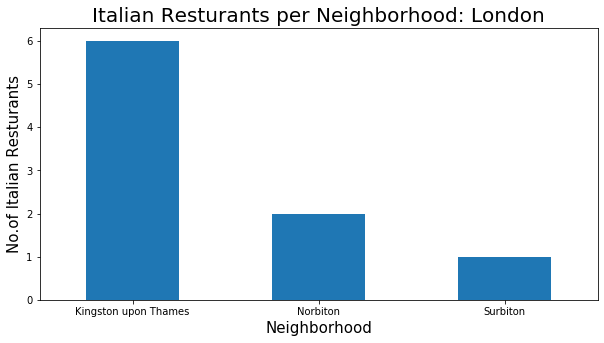

In [75]:
italian_rest.groupby('Neighborhood')['ID'].count().plot.bar(figsize=(10,5))
plt.title('Italian Resturants per Neighborhood: London', fontsize = 20)
plt.xlabel('Neighborhood', fontsize = 15)
plt.ylabel('No.of Italian Resturants', fontsize=15)
plt.xticks(rotation = 'horizontal')
plt.show()

**Using foursquare API we can explore venue details (likes, rating and tips) for the found Italian restaurants.**

In [77]:
column_names=['Borough', 'Neighborhood', 'ID','Name','Likes','Rating','Tips']
italian_rest_stats=pd.DataFrame(columns=column_names)
count=1
for row in italian_rest.values.tolist():
    Borough,Neighborhood,ID,Name=row
    try:
        venue_details=get_venue_details(ID)
        print(venue_details)
        id,name,likes,rating,tips=venue_details.values.tolist()[0]
    except IndexError:
        print('No data available for id=',ID)
        # we will assign 0 value for these resturants as they may have been 
        #recently opened or details does not exist in FourSquare Database
        id,name,likes,rating,tips=[0]*5
    print('(',count,'/',len(italian_rest),')','processed')
    italian_rest_stats = italian_rest_stats.append({'Borough': Borough,
                                                'Neighborhood': Neighborhood, 
                                                'ID': id,
                                                'Name' : name,
                                                'Likes' : likes,
                                                'Rating' : rating,
                                                'Tips' : tips
                                               }, ignore_index=True)
    count+=1

{'meta': {'code': 200, 'requestId': '5e07a8ec83525f001fc77ebb'}, 'response': {'venue': {'id': '4b9b848ef964a5207f0c36e3', 'name': 'Stone Pizza', 'contact': {'phone': '+442085493913', 'formattedPhone': '+44 20 8549 3913'}, 'location': {'address': '54 Fife Rd', 'lat': 51.411930488071796, 'lng': -0.3019087962748023, 'labeledLatLngs': [{'label': 'display', 'lat': 51.411930488071796, 'lng': -0.3019087962748023}], 'postalCode': 'KT1 1SU', 'cc': 'GB', 'city': 'Kingston', 'state': 'Greater London', 'country': 'United Kingdom', 'formattedAddress': ['54 Fife Rd', 'Kingston', 'Greater London', 'KT1 1SU', 'United Kingdom']}, 'canonicalUrl': 'https://foursquare.com/v/stone-pizza/4b9b848ef964a5207f0c36e3', 'categories': [{'id': '4bf58dd8d48988d110941735', 'name': 'Italian Restaurant', 'pluralName': 'Italian Restaurants', 'shortName': 'Italian', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/italian_', 'suffix': '.png'}, 'primary': True}], 'verified': False, 'stats': {'tipCount': 4},

In [78]:
italian_rest_stats

,Borough,Neighborhood,ID,Name,Likes,Rating,Tips
0,Kingston upon Thames,Kingston upon Thames,4b9b848ef964a5207f0c36e3,Stone Pizza,15,7.2,4
1,Kingston upon Thames,Kingston upon Thames,4c7ff48551ada1cd675f0510,Zizzi,24,6.6,10
2,Kingston upon Thames,Kingston upon Thames,4c7d543e3b22a1cd15975e9e,Al Forno,22,7.0,10
3,Kingston upon Thames,Kingston upon Thames,4f1ac193e4b0d1a654ebceb1,Carluccio's,27,6.4,12
4,Kingston upon Thames,Kingston upon Thames,4bcb26bb511f9521e7d2b0c7,Carluccio's,16,6.7,11
5,Kingston upon Thames,Kingston upon Thames,567449cd498e3a03e281b81c,Wildwood Kitchen,6,5.9,3
6,Kingston upon Thames,Norbiton,545bcf04498eac0b659cc6c9,Trattoria Calabrese,5,6.8,2
7,Kingston upon Thames,Norbiton,4ca4f28a931bb60c0f9885e2,Terra Mia,9,6.8,6
8,Kingston upon Thames,Surbiton,4c4c7a505609c9b6ba48a092,Allegro,5,5.8,9


**Since it is not a large number of Italian restaurants it is not necessary to do further analysis regarding the ratings of the restaurants, and we can see that restaurants Stone Pizza and Al Forno have the highest ratings.**  

**Results / Conclusion**

**Neighboorhood Kingston upon Thames in Kingston upon Thames has the greatest number of Italian restaurants, which are also with the greatest rating. On the other side, neighborhoods Berrylands, Canbury, Chessington,Coombe, Hook, Kingston Vale, Malden Rushett, Motspur Park, New Malden, Old Malden, Seething Wells, don't have any Italian restaurant. Neighborhoods Canbury and Berrylands have most attractive locations of this borough. Based on this information, I would state that Canbury and Berrylands are the best locations for Italian cuisine in Kingston upon Thames. Since there are no Italian restaurants, it makes competition easier than in other boroughs. As a final note, all of the above analysis is depended on the adequacy and accuracy of Four Square data. A more comprehensive analysis and future work would need to incorporate data from other external databases.**